In [112]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [113]:
housing = pd.read_csv("Housing.csv")
housing.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [115]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


# Exploratory data analysis

In [3]:
# if you don't have plotly express you can install it with pip install plotly_express

In [48]:
%%time
categorical = []
numerical = []

#This loop is basically for separating the categorical and numerical variable
for i in housing.columns:
    if housing[i].dtype=='O':
        categorical.append(i)
    else:
        numerical.append(i)

Wall time: 999 µs


In [6]:

numerical.remove('price')
numerical.remove('area')

In [7]:
start='\033[1m'
end='\033[0;0m'       
font = {'family': 'serif',
            'weight': 'normal',
            'size': 30,
            }
#function for ploting bar graph for each column of the dataframe
def plot_each_columns(data):
    for i in data.columns:
        
        df = data[i].value_counts()
        plt.figure(figsize=(30,10))
        sns.barplot(x=df.index, y=df)
        plt.xticks(rotation=90,fontsize = 20)
        plt.yticks(fontsize = 20)
        plt.title(i,fontdict=font)

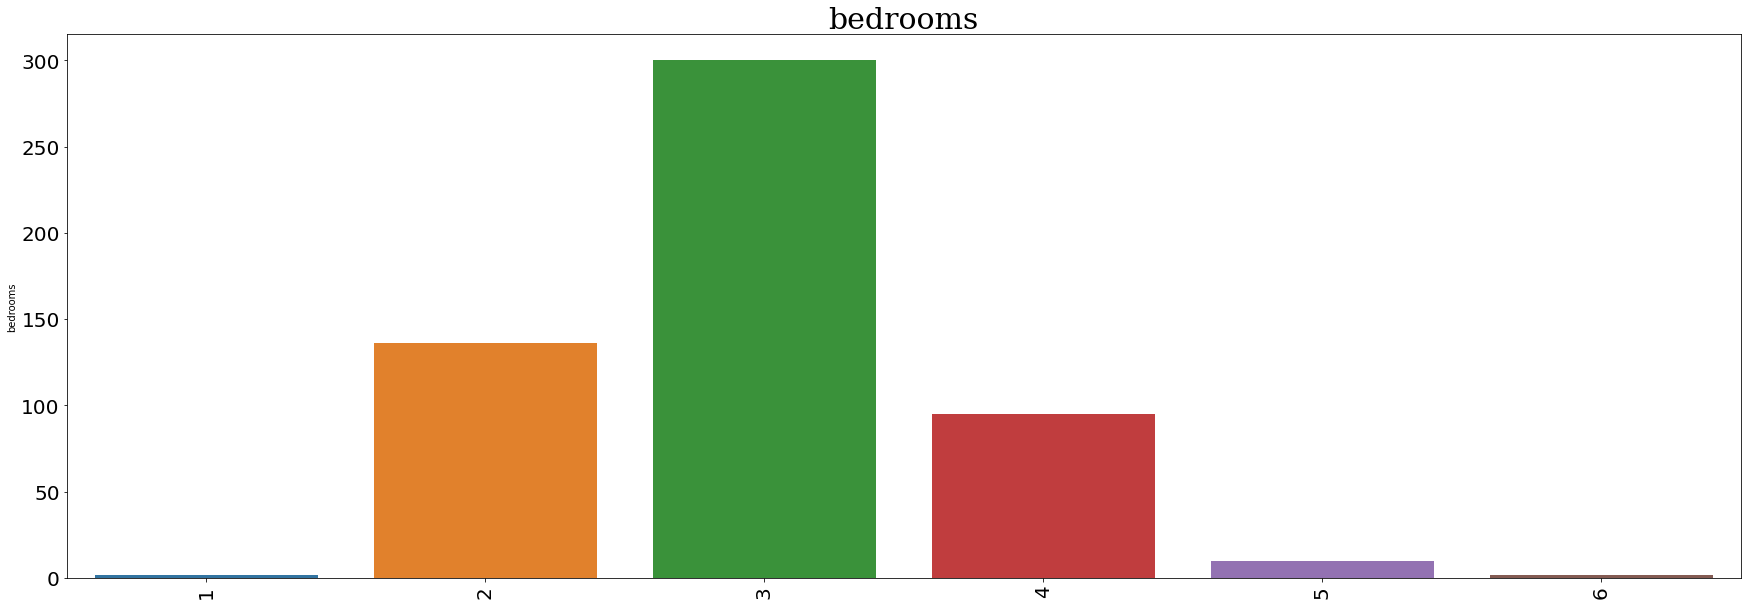

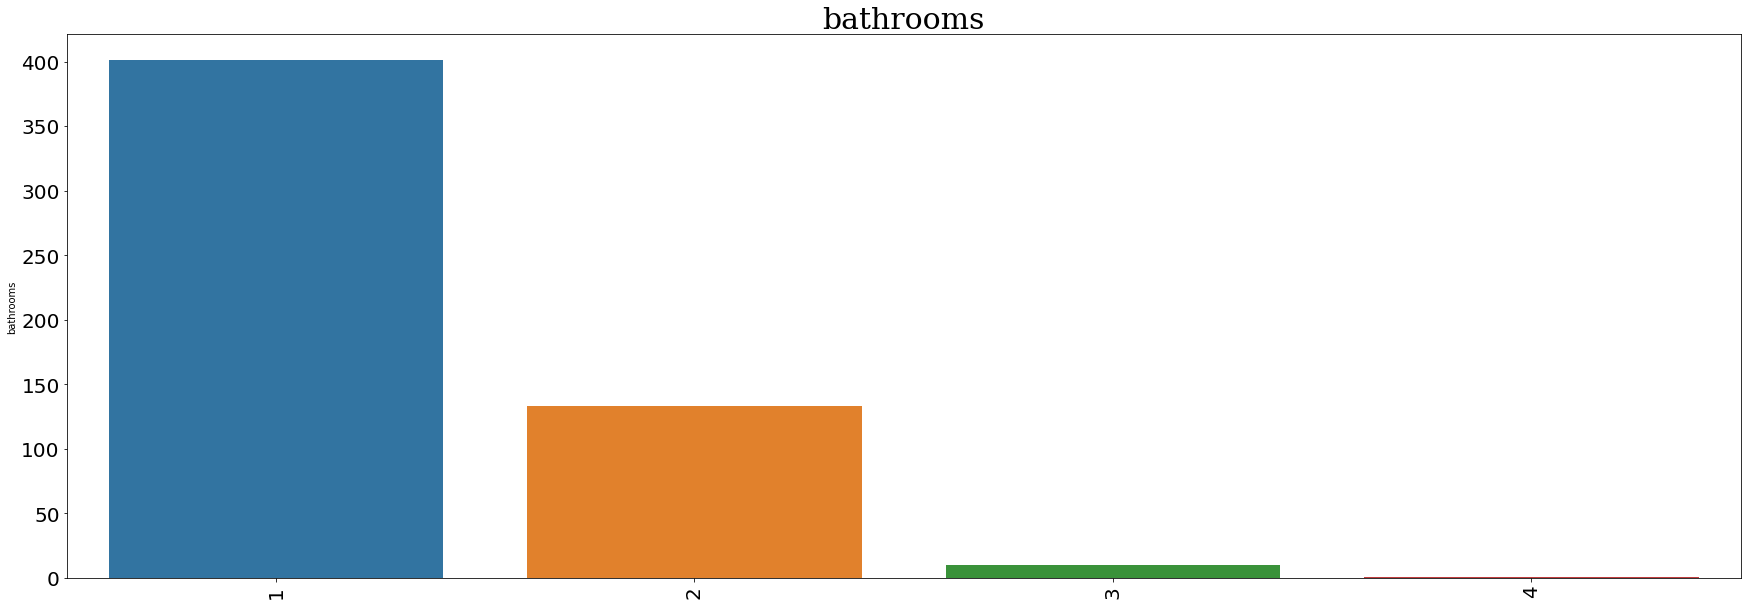

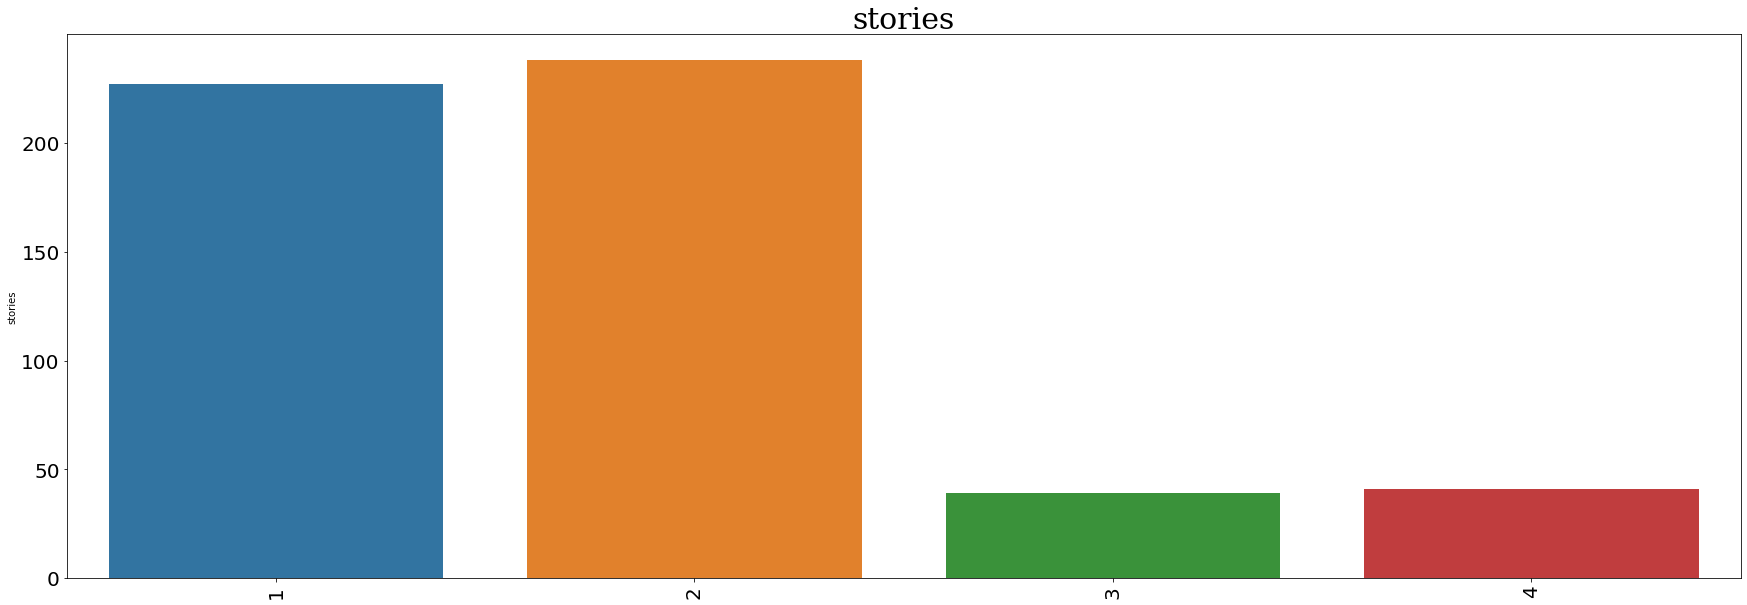

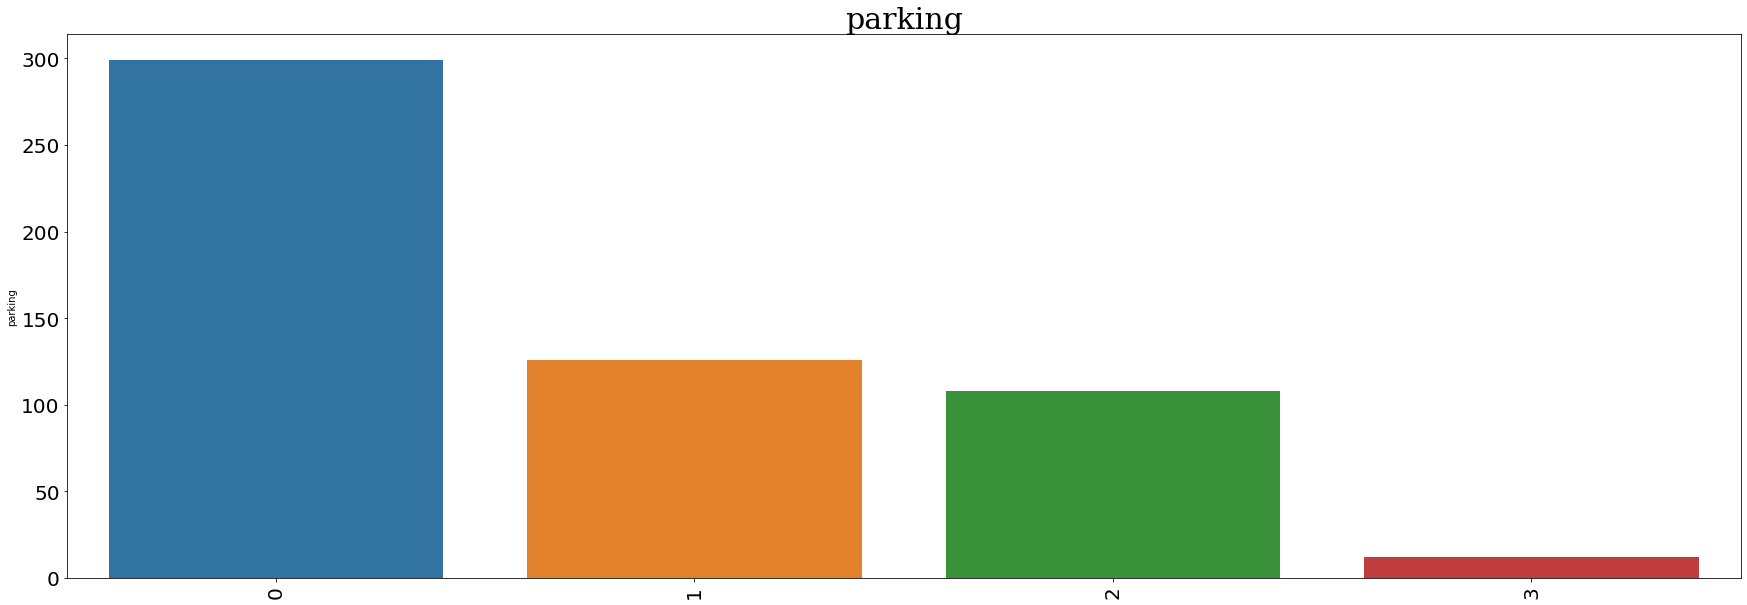

In [8]:
import seaborn as sns
plot_each_columns(housing[numerical])

In [9]:
fig = px.density_heatmap(housing, x="area", y="price")
fig.show()


# Gantt chart

In [149]:
import plotly.express as px

starting =pd.date_range('2015-07-03', periods=545)
ending = pd.date_range('2015-07-12', periods=545)

housing["Start Date"] = starting
housing["End Date"] = ending

housing.to_csv('housing.csv', index=False)

colors ={"furnished": "red", "semi-furnished": "orange", "unfurnished": "blue"}
fig = px.timeline(housing, x_start = "Start Date", x_end = "End Date", y = "furnishingstatus",
                 color = "furnishingstatus", color_discrete_map = colors)
# Tasks from top to bottom
fig.update_yaxes(autorange = "reversed") 
fig.show() 
 

In [117]:
import plotly.figure_factory as ff
fu= housing["furnishingstatus"].unique()
st = housing["Start Date"][:3]
en = housing["End Date"][:3]
df = pd.DataFrame({"Task":fu,"Start":st,"Finish":en})
fig = ff.create_gantt(df)
fig.show()

In [118]:
# mainroad	guestroom	basement	hotwaterheating	airconditioning	parking	prefarea	furnishingstatus
categorical_features = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea", "furnishingstatus"]



In [119]:
for i in categorical_features:
    data = housing[i].replace(housing[i].unique(),
                             range(len(housing[i].unique())), inplace=True)

In [120]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,Start Date,End Date
0,13300000,7420,4,2,3,0,0,0,0,0,2,0,0,2015-07-03,2015-07-12
1,12250000,8960,4,4,4,0,0,0,0,0,3,1,0,2015-07-04,2015-07-13
2,12250000,9960,3,2,2,0,0,1,0,1,2,0,1,2015-07-05,2015-07-14
3,12215000,7500,4,2,2,0,0,1,0,0,3,0,0,2015-07-06,2015-07-15
4,11410000,7420,4,1,2,0,1,1,0,0,2,1,0,2015-07-07,2015-07-16


In [121]:
housing["price"].max()

13300000

In [122]:
# for i in housing.keys():
#     print(housing[i].unique())

In [141]:
X = housing.drop(["price","area","Start Date","End Date"], axis=1)
y = housing["price"]

In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
# X_test.isnull()

In [143]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
# Define the preprocessing steps as a pipeline
preprocessing_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Replace missing values with mean
    ('scaler', preprocessing.RobustScaler()),  # Standardize the features
    # Add more preprocessing steps as needed
])

In [144]:
# Fit and transform the training data through the preprocessing pipeline
X_train_preprocessed = preprocessing_pipeline.fit_transform(X_train)

# Transform the test data using the learned preprocessing steps
X_test_preprocessed = preprocessing_pipeline.transform(X_test)

# Train a regression model using the preprocessed data
model = LinearRegression()
model.fit(X_train_preprocessed, y_train)

# Evaluate the model on the preprocessed test data
score = model.score(X_test_preprocessed, y_test)

In [145]:
score

0.6020336169706941

In [146]:
y_predict = model.predict(X_test)

C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:432: UserWarning:

X has feature names, but LinearRegression was fitted without feature names



In [147]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate mean squared error (MSE)
mse = mean_squared_error( y_predict,y_test)

# Calculate R-squared
r2 = r2_score( y_predict,y_test)

# Calculate the root mean squared error (RMSE) of the predictions
# rmse = np.sqrt(np.mean( (y_predict,y_test) ** 2))


# Print the metrics
print("Mean squared error:", mse)
print("R-squared:", r2)
# print("RMSE: ", rmse)


Mean squared error: 1967488079906.4397
R-squared: 0.17926465670675618
